In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [3]:
gdp_df.shape

(7176, 4)

### 5a)     7176, 4


In [4]:
gdp_df.value_counts()

Series([], dtype: int64)

### 5B) object

In [5]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [8]:
gdp_df
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235


# 7

In [9]:
gdp_df['Country'].value_counts()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [10]:
len(gdp_df['Year'].unique())

31

In [11]:
gdp_df['Year'].value_counts()

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

In [12]:
gdp_df.groupby('Country')['Year'].nunique() ## just testing these out for comparison



Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Year, Length: 242, dtype: int64

In [13]:
gdp_df.groupby('Country')['Year'].unique() ## just testing these out for comparison

Country
Afghanistan                    [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Africa Eastern and Southern    [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Africa Western and Central     [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Albania                        [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Algeria                        [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
                                                     ...                        
Vietnam                        [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
West Bank and Gaza             [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
World                          [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Zambia                         [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Zimbabwe                       [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Name: Year, Length: 242, dtype: object

In [14]:
countries_with_all_years = gdp_df.groupby('Country')['Year'].nunique()
countries_missing_years = countries_with_all_years[countries_with_all_years < len(gdp_df['Year'].unique())]

In [15]:
len(countries_with_all_years[countries_with_all_years == len(gdp_df['Year'].unique())])

205

In [16]:
count_of_qualified_countries = len(countries_with_all_years[countries_with_all_years == len(gdp_df['Year'].unique())])

In [17]:
count_of_qualified_countries

205

In [18]:
countries_without_every_year = countries_with_all_years[countries_with_all_years < len(gdp_df['Year'].unique())]

In [19]:
print('Qualifying Countries:')
print(count_of_qualified_countries)

Qualifying Countries:
205


In [20]:
print('Countries excluded:')
print(countries_without_every_year.sort_values(ascending=False))

Countries excluded:
Country
Turkmenistan                 30
Hungary                      30
Slovak Republic              29
Cambodia                     28
West Bank and Gaza           27
Bosnia and Herzegovina       27
Kuwait                       26
Slovenia                     26
Serbia                       26
Moldova                      26
Lithuania                    26
Latvia                       26
Maldives                     26
Iceland                      26
Estonia                      26
Israel                       26
Croatia                      26
San Marino                   24
Small states                 24
Canada                       24
Montenegro                   24
Libya                        22
Liberia                      21
Timor-Leste                  21
Other small states           21
Palau                        21
Qatar                        21
CuraÃ§ao                     21
SÃ£o TomÃ© and Principe      20
Afghanistan                  19
Nauru       

## kept in extra coding to just reference and practice different times for 7, 205 total that have been in every year, age of country, liberation of country, could all have impact in requested data.

# 8) year = 2020 , GDP_Per_Capita
 histogram, density plot, boxplot, violin plot - what do I notice
 compare and contrast various info with each selection

In [21]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [22]:
gdp2020 = gdp_df[gdp_df['Year'] == 2020]

## Histogram Plot

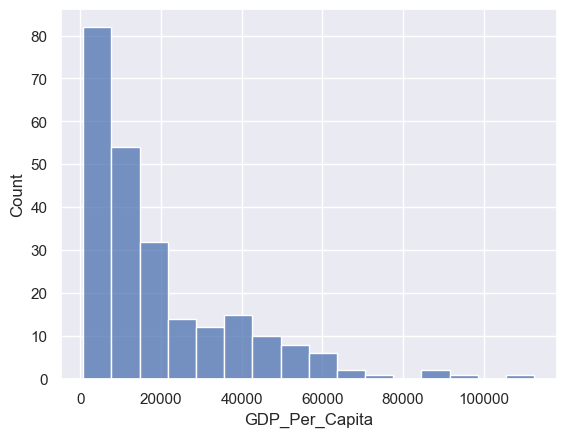

In [23]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
sns

sns.histplot(data=gdp2020, x="GDP_Per_Capita")
plt.show() ##Histogram

## Looks like a bunch of broke countries

## Density Plot Same Data

C:\Users\patri\AppData\Local\Temp\ipykernel_17676\2447469971.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gdp2020['GDP_Per_Capita'], shade=True)


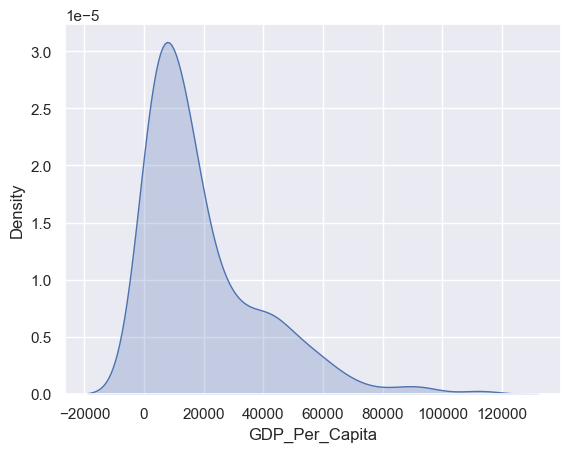

In [24]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
 
# density plot with shaded area with kdeplot 'shade' parameter
sns.kdeplot(gdp2020['GDP_Per_Capita'], shade=True)
plt.show()

# Density Chart showing how most are in the poor range

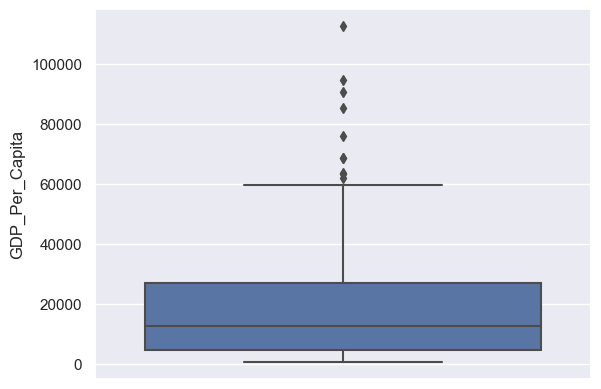

In [25]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

sns.boxplot(y=gdp2020["GDP_Per_Capita"])
plt.show()

# This shows the few outliers of most of the countries when it comes to GDP value.

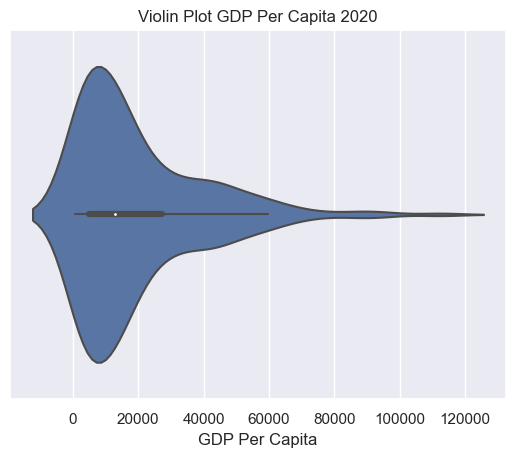

In [100]:
import seaborn as sns
sns.violinplot(x=gdp2020['GDP_Per_Capita'])
plt.xlabel('GDP Per Capita')
plt.title('Violin Plot GDP Per Capita 2020')
plt.show()

# looks like a stingray. lol


# 9) median gdp value of 2020 -- 12908

In [27]:
median_2020_gdp = gdp2020['GDP_Per_Capita'].median()

In [28]:
print(median_2020_gdp)

12908.9374056206


## 10)  create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [29]:
years = [1990,2000,2010,2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years)]

9 Boxplot

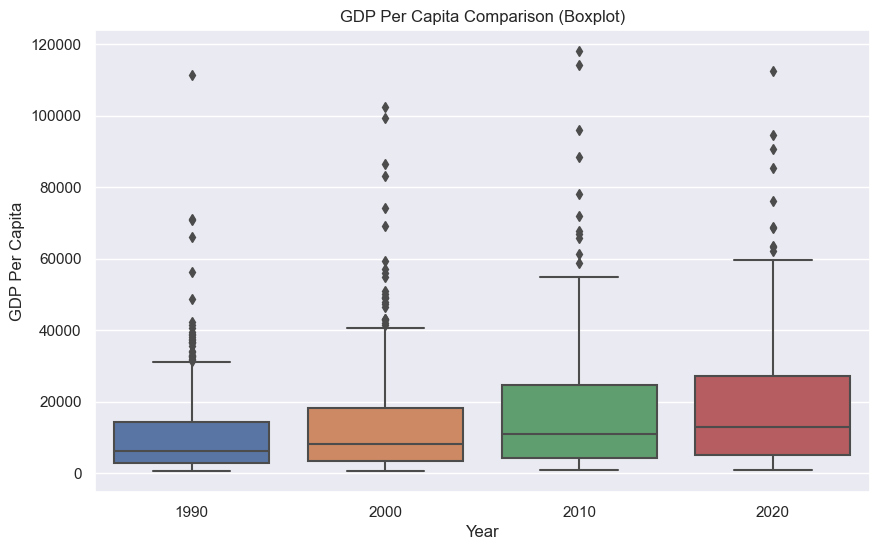

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Comparison (Boxplot)')
plt.show()

 Barplot

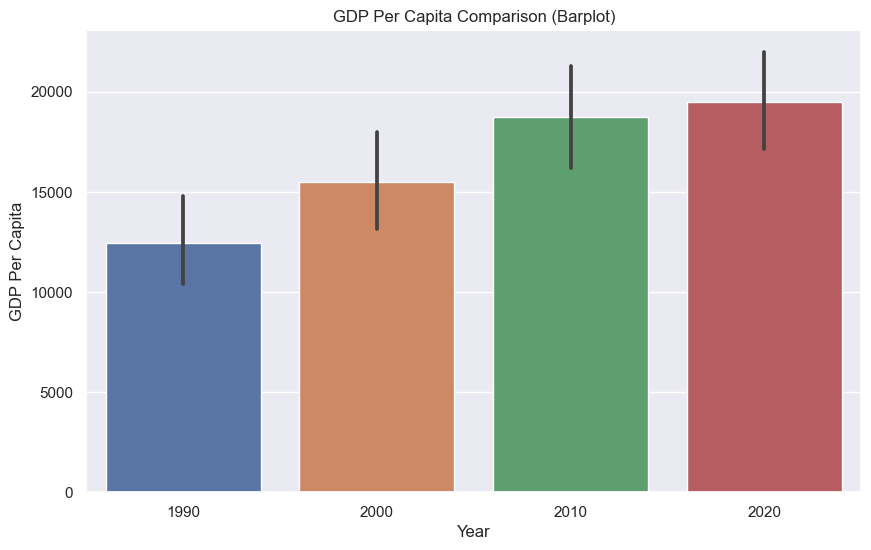

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Comparison (Barplot)')
plt.show()

 Scatterplot

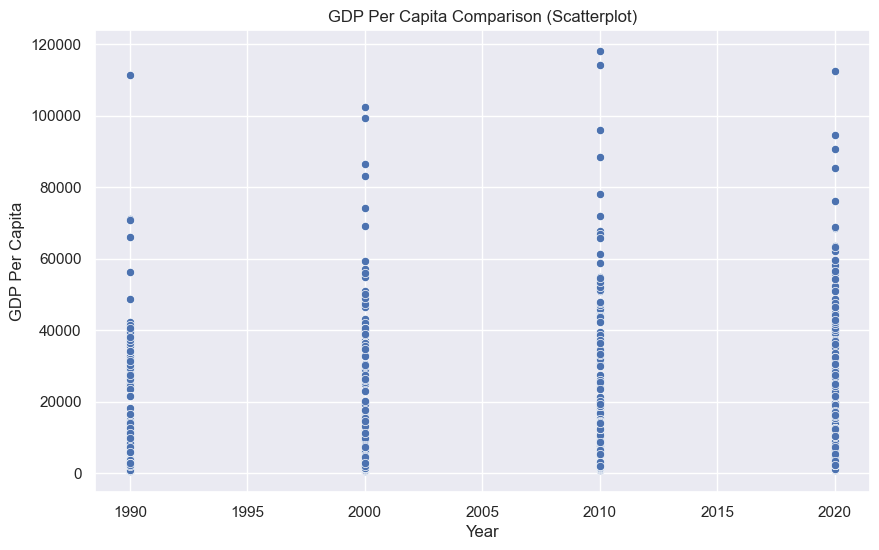

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Comparison (Scatterplot)')
plt.show()

 Scatterplot with trend line

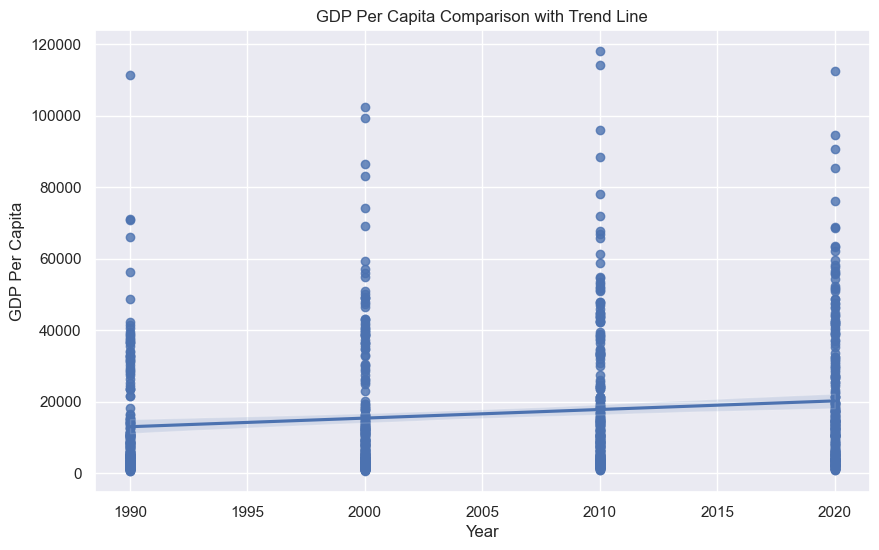

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Comparison with Trend Line')
plt.show()

Scatter plot with trend with different code

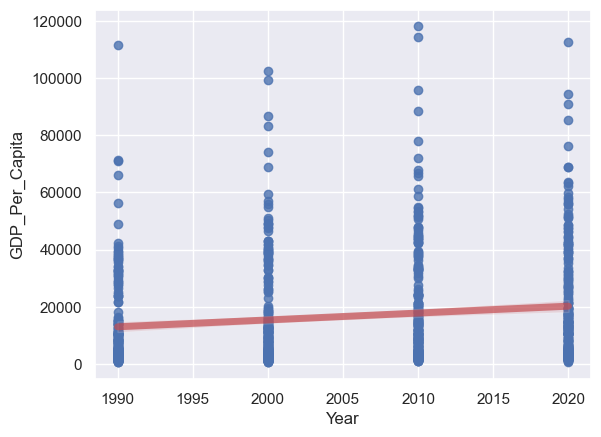

In [34]:
# library &amp; dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# plot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In [36]:
gdp_df.tail()

,Country,Year,GDP_Per_Capita
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626
7175,Zimbabwe,1990,2652.129209


11) Which country was the first to have a GDP per capita greater than 100,000

In [38]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [39]:
gdp_df['Year'].min()

1990

In [41]:
gdp_df.groupby('Country')['Year'].unique()

Country
Afghanistan                    [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Africa Eastern and Southern    [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Africa Western and Central     [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Albania                        [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Algeria                        [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
                                                     ...                        
Vietnam                        [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
West Bank and Gaza             [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
World                          [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Zambia                         [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Zimbabwe                       [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...
Name: Year, Length: 242, dtype: object

In [55]:
gdp_greater_than_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]


In [56]:
earliest_year = gdp_greater_than_100k['Year'].min()


In [57]:
earliest_year_data = gdp_greater_than_100k[gdp_greater_than_100k['Year'] == earliest_year]


In [58]:
first_country = earliest_year_data['Country'].iloc[0]


In [69]:
print(first_country)

United Arab Emirates


12) Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [ ]:
gdp_df['GDP_Per_Capita'].max()

In [87]:
year_2020 = gdp_df[gdp_df['Year'] == 2020]

In [88]:
max_gdp_2020 = year_2020[year_2020['GDP_Per_Capita'] == year_2020['GDP_Per_Capita'].max()]


In [89]:
print(max_gdp_2020)

         Country  Year  GDP_Per_Capita
3882  Luxembourg  2020   112557.309472


In [90]:
topcountry_maxgdp_2020 = max_gdp_2020['Country'].iloc[0]


In [91]:
print(topcountry_maxgdp_2020)

Luxembourg


In [92]:
topcountry_gdp_stats_over_time = gdp_df[gdp_df['Country'] == topcountry_maxgdp_2020]

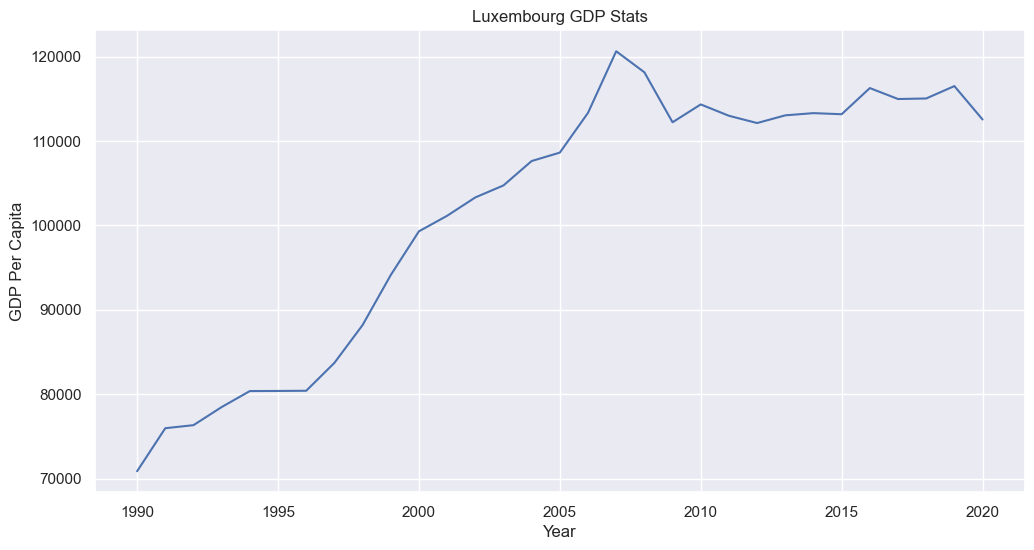

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=topcountry_gdp_stats_over_time, x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Luxembourg GDP Stats')
plt.show()


13) Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

In [86]:
min_year_2020 = gdp_df[gdp_df['Year'] == 2020]

In [94]:
min_gdp_2020 = min_year_2020[min_year_2020['GDP_Per_Capita'] == min_year_2020['GDP_Per_Capita'].min()]


In [95]:
print(min_gdp_2020)

     Country  Year  GDP_Per_Capita
914  Burundi  2020      731.064074


In [97]:
bottom_country_min_gdp_2020 = min_gdp_2020['Country'].iloc[0]

In [98]:
min_country_gdp_stats_over_time = gdp_df[gdp_df['Country'] ==bottom_country_min_gdp_2020]

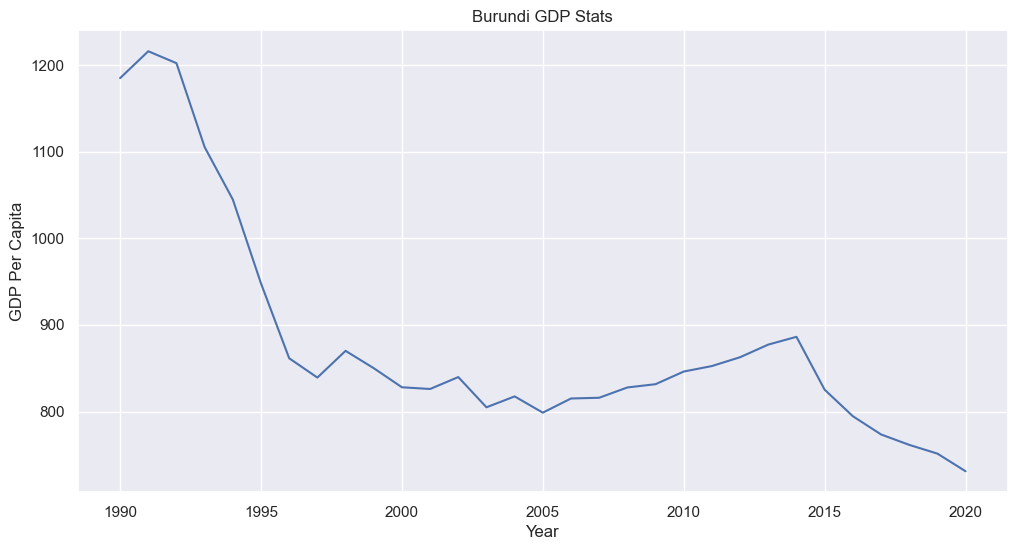

In [99]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=min_country_gdp_stats_over_time, x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Burundi GDP Stats')
plt.show()


####### Burundi had lowest GDP in 2020 /// didn't know if there needs to be a syntax for making titles or just editing it
to include the name, will ask for feedback later

####### Will do 13 bonus later

14) importing additional dataset - internet_df

In [106]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)


15) Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'

In [107]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [110]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [113]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [114]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year',  'Value': 'Internet_Users_Pct'})

In [115]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


16) Look at the number of observations in this dataset per year. What do you notice? 1960 - 2014 year range, 1990 huge spike where it's highest (maybe USSR?, then dips down drastically  until around Y2K

In [130]:
internet_df.info()
type(internet_df)
internet_df.shape
internet_df.head()
internet_df.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


Country      Year  Internet_Users_Pct
Afghanistan  1990  0.000000              1
Niger        2014  1.950000              1
Nigeria      2000  0.064081              1
             1999  0.041039              1
             1998  0.025231              1
                                        ..
Georgia      2008  10.010000             1
             2009  20.070000             1
             2010  26.900000             1
             2011  31.520000             1
Zimbabwe     2014  19.890000             1
Length: 4495, dtype: int64

In [134]:
top_internet_countries = internet_df.sort_values(by = 'Internet_Users_Pct', ascending = False)

17) What is the first year to have a non-zero internet users percentage value? 1990

In [141]:
first_year_non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0]

In [142]:
first_year_non_zero['Year'].min()

1990